In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("car details v4.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
print(df.info())        
print(df.isnull().sum())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [ ]:

df["Engine"] = df["Engine"].astype(str)
df["Engine"] = df["Engine"].str.extract(r'(\d+\.?\d*)').astype(float)

df["Engine"] = df["Engine"].fillna(df["Engine"].median())

In [ ]:
key_numeric_cols = ["Engine", "Max Power", "Max Torque", "Drivetrain", "Length", "Width", "Height", "Seating Capacity", "Fuel Tank Capacity"]

df = df.dropna(subset=key_numeric_cols, how="all").reset_index(drop=True)

df["Max Power"] = df["Max Power"].astype(str)

df["Max Power"] = df["Max Power"].str.extract(r'(\d+\.?\d*)').astype(float)
df["Max Power"] = df["Max Power"].fillna(df["Max Power"].median())

In [ ]:
df["Max Torque"] = df["Max Torque"].astype(str)
df["Max Torque"] = df["Max Torque"].str.extract(r"(\d+\.?\d*)")
df["Max Torque"] = pd.to_numeric(df["Max Torque"], errors="coerce")
df["Max Torque"] = df["Max Torque"].fillna(df["Max Torque"].median())

In [ ]:
df["Drivetrain"] = df["Drivetrain"].fillna(df["Drivetrain"].mode()[0])


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Drivetrain"] = le.fit_transform(df["Drivetrain"])

In [ ]:
num_cols = ["Length", "Width", "Height", "Seating Capacity", "Fuel Tank Capacity"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# from sklearn.preprocessing import LabelEncoder

cat_cols = ["Make", "Model", "Fuel Type", "Transmission", "Location",
            "Color", "Owner", "Seller Type"]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("=== NaN VALUES DIAGNOSTIC ===")
print(f"X_train shape: {X_train.shape}")
print(f"Total NaN values in X_train: {X_train.isnull().sum().sum()}")
print("\nNaN values by column:")
print(X_train.isnull().sum())

nan_columns = X_train.columns[X_train.isnull().any()].tolist()
print(f"\nColumns with NaN values: {nan_columns}")


=== NaN VALUES DIAGNOSTIC ===
X_train shape: (1647, 19)
Total NaN values in X_train: 0

NaN values by column:
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

Columns with NaN values: []


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully!")

Linear Regression trained successfully!
Random Forest trained successfully!
Decision Tree trained successfully!
Gradient Boosting trained successfully!


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    print(f"\n{name} Performance:")
    print(f"RMSE: ₹{rmse:,.0f}")
    print(f"MAE: ₹{mae:,.0f}")
    print(f"R² Score: {r2:.4f}")


best_model_name = max(results.keys(), key=lambda x: results[x]['R²'])
best_model = trained_models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name}")


Linear Regression Performance:
RMSE: ₹1,390,351
MAE: ₹757,188
R² Score: 0.7233

Random Forest Performance:
RMSE: ₹1,092,965
MAE: ₹298,170
R² Score: 0.8290

Decision Tree Performance:
RMSE: ₹989,409
MAE: ₹368,349
R² Score: 0.8599

Gradient Boosting Performance:
RMSE: ₹929,403
MAE: ₹323,783
R² Score: 0.8764

🏆 Best Model: Gradient Boosting


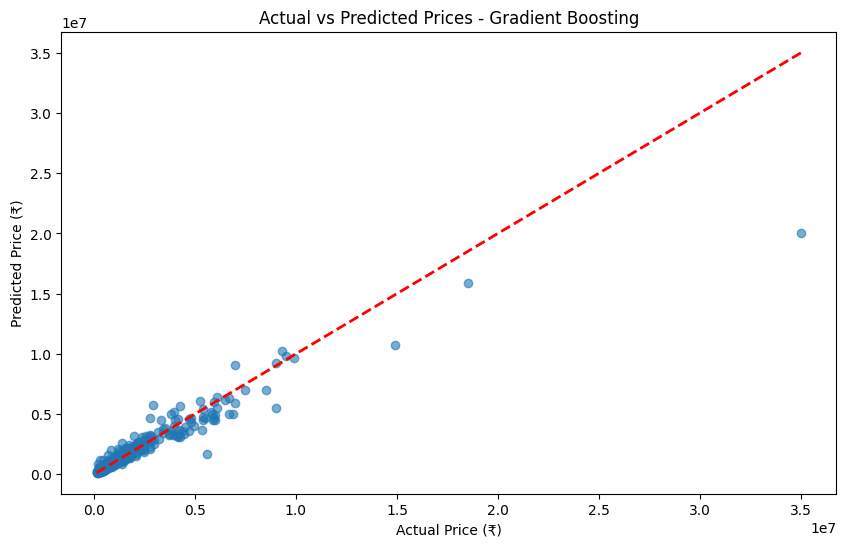

Top 10 Most Important Features:
               feature  importance
11           Max Power    0.594543
2                 Year    0.096820
18  Fuel Tank Capacity    0.080578
14              Length    0.067285
3            Kilometer    0.036416
15               Width    0.035000
12          Max Torque    0.024124
5         Transmission    0.014169
10              Engine    0.011544
17    Seating Capacity    0.011027


In [ ]:
import matplotlib.pyplot as plt

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.show()

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

In [ ]:
def predict_car_price(make, model, year, kilometer, fuel_type, transmission,
                     location, color, owner, seller_type, engine, max_power,  # Added these
                     max_torque, drivetrain, length, width, height,
                     seating_capacity, fuel_tank_capacity):

    input_data = np.array([[make, model, year, kilometer, fuel_type,
                           transmission, location, color, owner, seller_type,
                           engine, max_power, max_torque, drivetrain, length,
                           width, height, seating_capacity, fuel_tank_capacity]])

    input_df = pd.DataFrame(input_data, columns=X_train.columns)

    prediction = best_model.predict(input_df)
    return prediction[0]


In [ ]:
sample_prediction = predict_car_price(
    make=1, model=50, year=2018, kilometer=50000, fuel_type=1,
    transmission=1, location=10, color=5, owner=1, seller_type=1,
    engine=1200, max_power=100,  # Added these 
    max_torque=200, drivetrain=1, length=4500, width=1800, height=1500,
    seating_capacity=5, fuel_tank_capacity=45
)
print(f"Sample prediction: ₹{sample_prediction:,.0f}")

Sample prediction: ₹1,287,349
